### Reading the data

In [1]:
import pandas as pd
data = pd.read_csv('advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


getting info about the data

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### checking missing values

In [3]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### checking duplicates

In [4]:
data.duplicated().sum()

0

### pointing out the outliers
see that in newspaper, we have two outliers, outliers not always but effect our data, model, during, rffect the accuracy, that why we remove the outliers and consider it a part of data cleaning

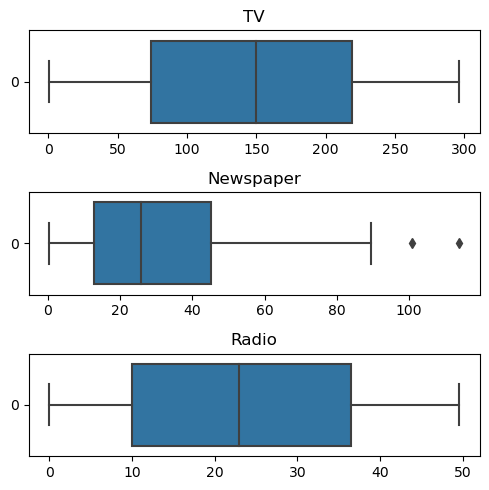

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0], orient = 'h')
plt1.set_title('TV')
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1], orient = 'h')
plt2.set_title('Newspaper')
plt3 = sns.boxplot(data['Radio'], ax = axs[2], orient = 'h')
plt3.set_title('Radio')
plt.tight_layout()
plt.show()   

### Finding the outliers
the outlier in Newspaper are above the 100 values

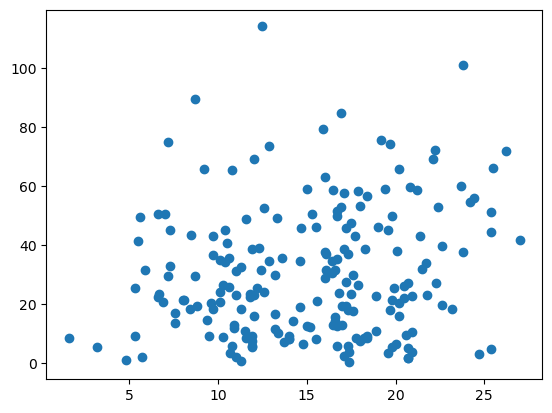

In [6]:
plt.scatter(data['Sales'], data['Newspaper']);

we sort the data by newspaper, to get the index of outliers, so we can remove them easily

In [7]:
data.sort_values(by = 'Newspaper', ascending = False)

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8
75,16.9,43.7,89.4,8.7
165,234.5,3.4,84.8,16.9
118,125.7,36.9,79.2,15.9
...,...,...,...,...
42,293.6,27.7,1.8,20.7
139,184.9,43.9,1.7,20.7
8,8.6,2.1,1.0,4.8
65,69.0,9.3,0.9,11.3


here the outlier will be dropped form the data

In [8]:
outliers_dropped = data.drop(data.index[[16, 101]])

### now see, we use scatter to see if there are outliers or not

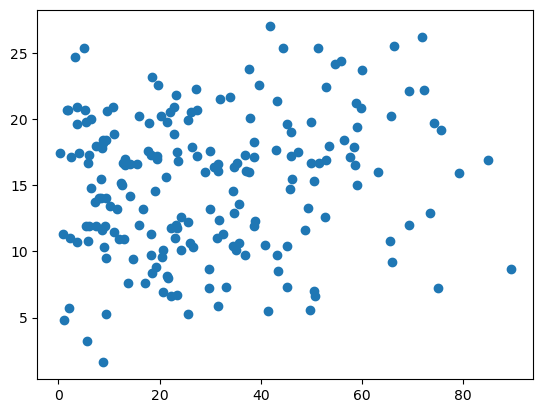

In [9]:
plt.scatter(outliers_dropped['Newspaper'], outliers_dropped['Sales'])

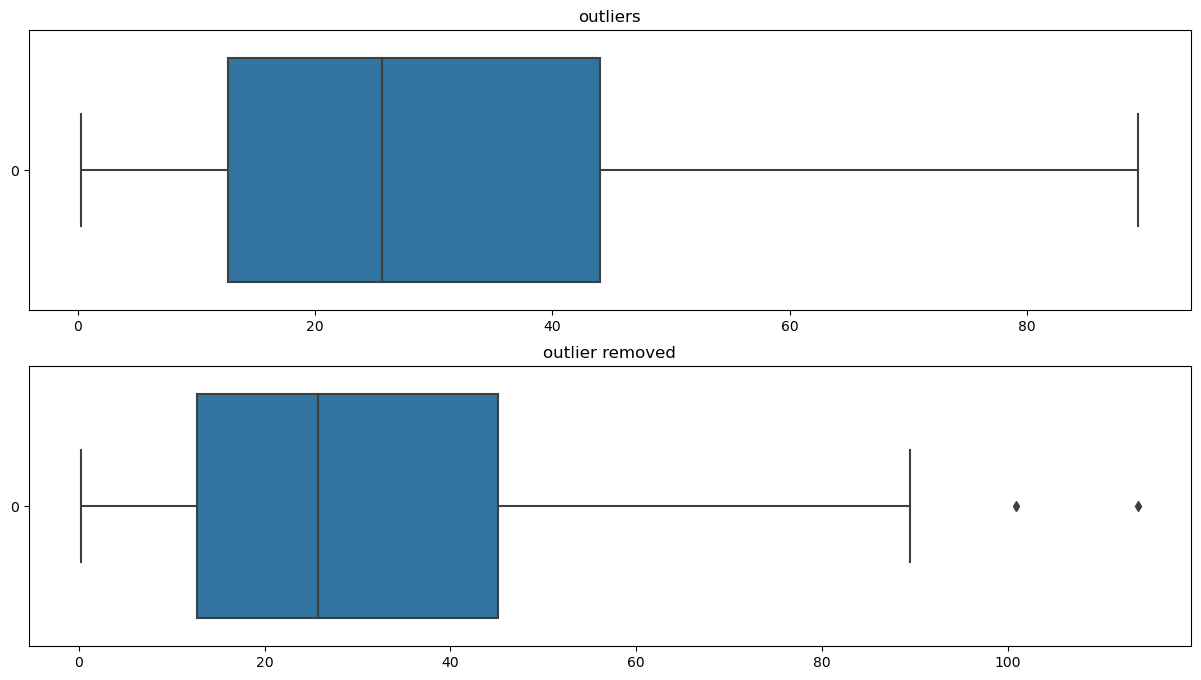

In [10]:
fig, axs = plt.subplots(2,1, figsize = (15, 8))

plt1 = sns.boxplot(outliers_dropped['Newspaper'], ax = axs[0], orient = 'h')
plt1.set_title('outliers')
plt2 = sns.boxplot(data['Newspaper'], ax= axs[1], orient = 'h')
plt2.set_title('outlier removed')
plt.show()

### Visulation of Target

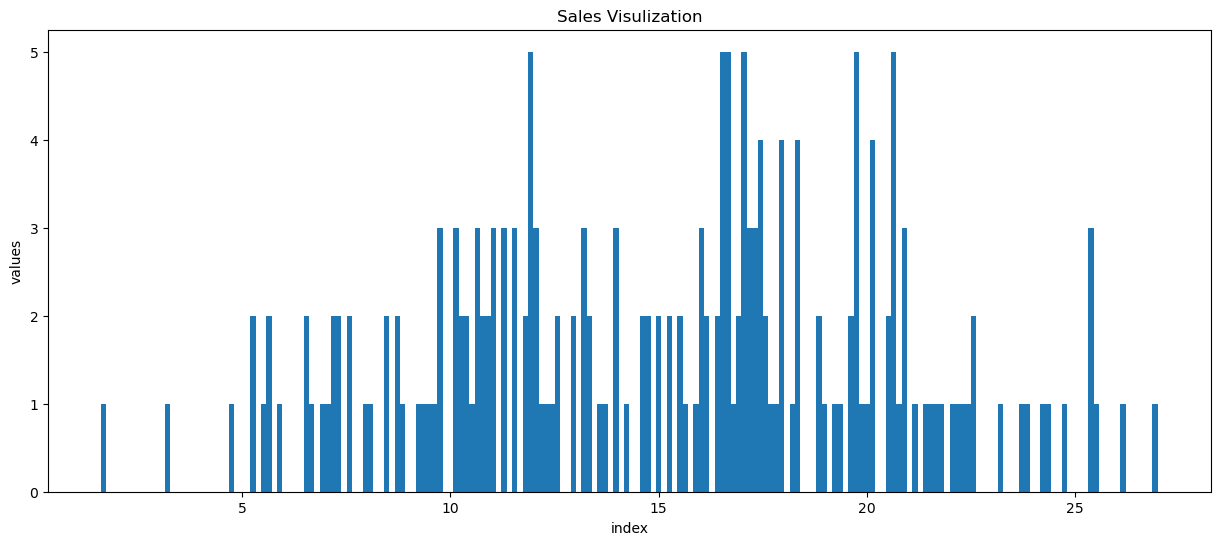

In [11]:
bins = outliers_dropped['Sales'].value_counts().sum()
plt.figure(figsize=(15,6))
plt.hist(x=outliers_dropped['Sales'], bins = bins);
plt.title("Sales Visulization")
plt.xlabel('index')
plt.ylabel('values')
plt.show();

### Visulize What effect the sales more and what don't
from the graph we can see that, TV is effecting the sales others are not affecting it like TV, so we'll just consider the TV our feature and predict the tread of Sales for future
But there's an important thing to note, we can do prediction on just one feature but the accuracy of the model will surely decreased cause we're providing not quite enough features to train our model

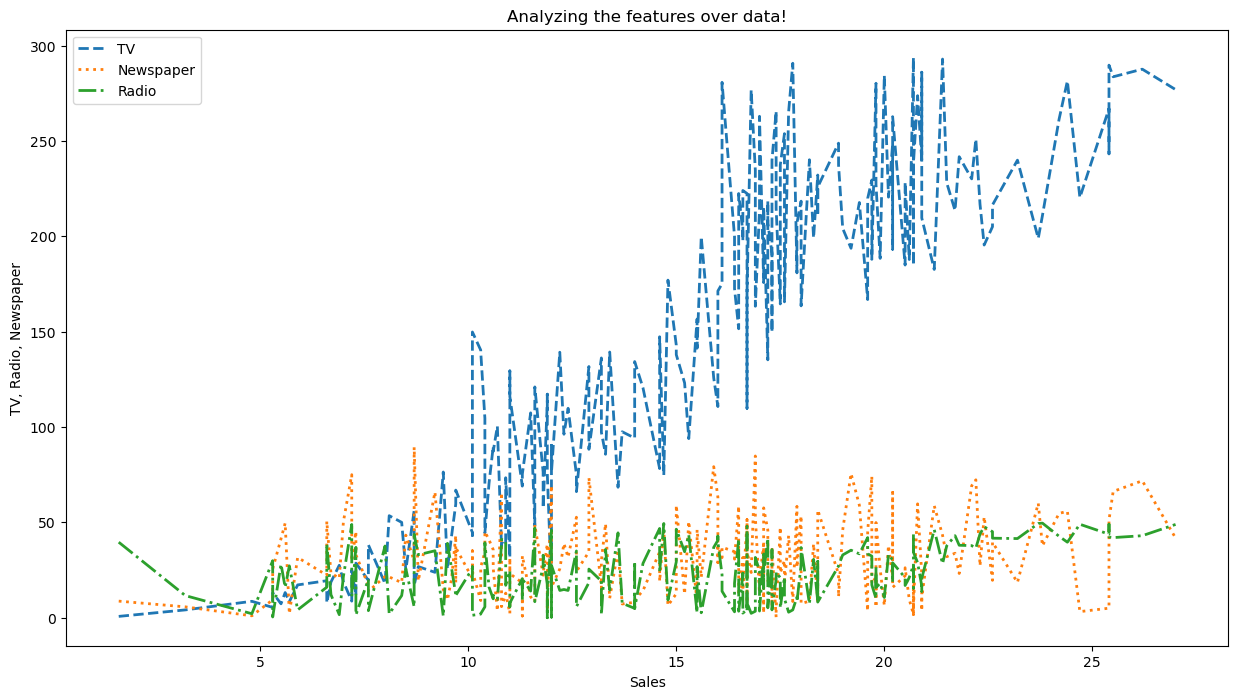

In [12]:
import matplotlib.pyplot as plt
so = outliers_dropped.sort_values(by = 'Sales')
plt.figure(figsize=(15, 8))
plt.plot(so['Sales'], so['TV'], linestyle='--', linewidth=2, label='TV')
plt.plot(so['Sales'], so['Newspaper'], linestyle=':', linewidth=2, label='Newspaper')
plt.plot(so['Sales'], so['Radio'], linestyle='-.', linewidth=2, label='Radio')

plt.title('Analyzing the features over data!')
plt.xlabel('Sales')
plt.ylabel('TV, Radio, Newspaper')
plt.legend()

plt.show()


### splitting the target and feature

In [13]:
x_tv = outliers_dropped[['TV']]
# x = outliers_dropped.drop('Sales', axis = 1)
y = outliers_dropped['Sales']

In [14]:
from sklearn.linear_model import Ridge
model = Ridge()

### splitting the training and testing sets

In [15]:
from sklearn.model_selection import train_test_split
x_tv_train, x_tv_test, y_train, y_test = train_test_split(x_tv, y, test_size = 0.2, random_state = 20)

In [16]:
model.fit(x_tv_train, y_train)

Ridge()

### Evaluation of the Model

In [17]:
model.score(x_tv_train, y_train)

0.7900081447116287

In [18]:
model.score(x_tv_test, y_test)

0.8554715942945241

In [19]:
y_pred = model.predict(x_tv_test)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 5.559299578301702
Root Mean Squared Error (RMSE): 2.357816697349839
Mean Absolute Error (MAE): 1.912231392290201
R-squared (R2): 0.8554715942945241
